In [1]:
import pandas as pd

analysis_df = pd.read_csv("Coaching_analysis_Data.csv")

print(analysis_df.shape)
analysis_df.head()


(1023, 13)


,Coach,Year,Era,HC_Tenure_Year,HC_Tenure_Year_Team,Team,Conference,Level,Tier,Wins,Losses,Nat_Champ_Won,Nat_Champ_Appearance
0,Alex Golesh,2023,NIL + Portal,1,1,South Florida,AAC,FBS,G5,7.0,6.0,0,0
1,Alex Golesh,2024,NIL + Portal,2,2,South Florida,AAC,FBS,G5,7.0,6.0,0,0
2,Alex Golesh,2025,NIL + Portal,3,3,South Florida,AAC,FBS,G5,6.0,2.0,0,0
3,Bill O'Brien,2012,BCS,1,1,Penn State,Big Ten,FBS,P5,8.0,4.0,0,0
4,Bill O'Brien,2013,BCS,2,2,Penn State,Big Ten,FBS,P5,7.0,5.0,0,0


In [2]:
# Unique coaches
analysis_df["Coach"].nunique(), analysis_df["Coach"].unique()[:10]

# Eras distribution
analysis_df["Era"].value_counts()

# National title count by coach
analysis_df.groupby("Coach")["Nat_Champ_Won"].sum().sort_values(ascending=False).head(15)


Coach
Nick Saban      7
Urban Meyer     3
Dabo Swinney    2
Joe Paterno     2
Kirby Smart     2
Pete Carroll    2
Bob Stoops      1
Ed Orgeron      1
Jim Harbaugh    1
Les Miles       1
Mack Brown      1
Ryan Day        1
Lou Holtz       1
Jimbo Fisher    1
Jim Tressel     1
Name: Nat_Champ_Won, dtype: int64

In [3]:
!pip install statsmodels


In [4]:
import pandas as pd

analysis_df = pd.read_csv("Coaching_analysis_Data.csv")

# Ensure Year is numeric
analysis_df["Year"] = pd.to_numeric(analysis_df["Year"], errors="coerce")

# One row per coach–team stint
stints = (
    analysis_df
    .groupby(["Coach", "Team"], as_index=False)
    .agg(
        tenure_len   = ("HC_Tenure_Year_Team", "max"),  # total years at that team
        first_year   = ("Year", "min"),
        last_year    = ("Year", "max"),
        hire_era     = ("Era", "first"),      # era when they started there
        tier         = ("Tier", "first"),
        level        = ("Level", "first"),
        conference   = ("Conference", "first"),
        total_wins   = ("Wins", "sum"),
        total_losses = ("Losses", "sum"),
        nat_titles   = ("Nat_Champ_Won", "sum"),
        nat_appear   = ("Nat_Champ_Appearance", "sum")
    )
)

# Optional: overall win percentage for the stint
stints["tenure_win_pct"] = stints["total_wins"] / (stints["total_wins"] + stints["total_losses"])

stints.head()


,Coach,Team,tenure_len,first_year,last_year,hire_era,tier,level,conference,total_wins,total_losses,nat_titles,nat_appear,tenure_win_pct
0,Alex Golesh,South Florida,3,2023,2025,NIL + Portal,G5,FBS,AAC,20.0,14.0,0,0,0.588235
1,Bill O'Brien,Boston College,2,2024,2025,NIL + Portal,P5,FBS,ACC,8.0,14.0,0,0,0.363636
2,Bill O'Brien,Penn State,2,2012,2013,BCS,P5,FBS,Big Ten,15.0,9.0,0,0,0.625000
3,Billy Napier,Florida,4,2022,2025,NIL + Portal,P5,FBS,SEC,22.0,23.0,0,0,0.488889
4,Billy Napier,Louisiana,4,2018,2021,CFP + Portal,G5,FBS,Sun Belt,40.0,12.0,0,0,0.769231


In [5]:
import pandas as pd

# if you already have `stints` defined, you don't need this line
# stints = pd.read_csv("whatever_you_named_it.csv")

# Add binary columns
stints["is_p5"] = (stints["tier"] == "P5").astype(int)
stints["is_fbs"] = (stints["level"] == "FBS").astype(int)

# See the result
print(stints.head())


          Coach            Team  tenure_len  first_year  last_year  \
0   Alex Golesh   South Florida           3        2023       2025   
1  Bill O'Brien  Boston College           2        2024       2025   
2  Bill O'Brien      Penn State           2        2012       2013   
3  Billy Napier         Florida           4        2022       2025   
4  Billy Napier       Louisiana           4        2018       2021   

       hire_era tier level conference  total_wins  total_losses  nat_titles  \
0  NIL + Portal   G5   FBS        AAC        20.0          14.0           0   
1  NIL + Portal   P5   FBS        ACC         8.0          14.0           0   
2           BCS   P5   FBS    Big Ten        15.0           9.0           0   
3  NIL + Portal   P5   FBS        SEC        22.0          23.0           0   
4  CFP + Portal   G5   FBS   Sun Belt        40.0          12.0           0   

   nat_appear  tenure_win_pct  is_p5  is_fbs  
0           0        0.588235      0       1  
1         

In [6]:
import pandas as pd

# Assuming `stints` is already created and has columns:
# ['Coach', 'Team', 'tenure_len', 'first_year', 'last_year',
#  'hire_era', 'tier', 'level', 'conference', ...]

# Add binary columns for P5 and FBS
stints["is_p5"] = (stints["tier"] == "P5").astype(int)
stints["is_fbs"] = (stints["level"] == "FBS").astype(int)

# Add binary column for "modern era" (CFP + Portal or NIL + Portal)
stints["is_modern_era_2018_present"] = stints["hire_era"].isin(
    ["CFP + Portal", "NIL + Portal"]
).astype(int)

print(stints.head())


          Coach            Team  tenure_len  first_year  last_year  \
0   Alex Golesh   South Florida           3        2023       2025   
1  Bill O'Brien  Boston College           2        2024       2025   
2  Bill O'Brien      Penn State           2        2012       2013   
3  Billy Napier         Florida           4        2022       2025   
4  Billy Napier       Louisiana           4        2018       2021   

       hire_era tier level conference  total_wins  total_losses  nat_titles  \
0  NIL + Portal   G5   FBS        AAC        20.0          14.0           0   
1  NIL + Portal   P5   FBS        ACC         8.0          14.0           0   
2           BCS   P5   FBS    Big Ten        15.0           9.0           0   
3  NIL + Portal   P5   FBS        SEC        22.0          23.0           0   
4  CFP + Portal   G5   FBS   Sun Belt        40.0          12.0           0   

   nat_appear  tenure_win_pct  is_p5  is_fbs  is_modern_era_2018_present  
0           0        0.588235

In [7]:
import pandas as pd
import statsmodels.formula.api as smf

# --- 1. Make sure the modern-era flag exists with the name you want ---

# Modern era = CFP + Portal OR NIL + Portal
stints["is_modern_era_2018_present"] = stints["hire_era"].isin(
    ["CFP + Portal", "NIL + Portal"]
).astype(int)

# Optional: drop rows with missing win pct (e.g., no games)
df_model = stints.dropna(subset=["tenure_len", "tenure_win_pct"])

# --- 2. Run the regression ---

formula = "tenure_len ~ tenure_win_pct + is_p5 * is_modern_era_2018_present + nat_titles"

model = smf.ols(formula, data=df_model).fit(cov_type="HC3")
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             tenure_len   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     8.286
Date:                Wed, 05 Nov 2025   Prob (F-statistic):           4.90e-07
Time:                        22:36:44   Log-Likelihood:                -525.98
No. Observations:                 178   AIC:                             1064.
Df Residuals:                     172   BIC:                             1083.
Df Model:                           5                                         
Covariance Type:                  HC3                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [8]:
import numpy as np
import pandas as pd

def starify(p):
    if p < 0.01:
        return "***"
    elif p < 0.05:
        return "**"
    elif p < 0.10:
        return "*"
    else:
        return ""

def reg_table_with_stars(model, digits=3):
    coef = model.params
    se = model.bse
    tval = model.tvalues
    pval = model.pvalues

    df = pd.DataFrame({
        "coef": coef,
        "std_err": se,
        "t": tval,
        "p>|t|": pval,
        "stars": [starify(p) for p in pval]
    })

    # round numeric columns
    num_cols = ["coef", "std_err", "t", "p>|t|"]
    df[num_cols] = df[num_cols].round(digits)

    return df

table = reg_table_with_stars(model)
print(table.to_string())


                                   coef  std_err      t  p>|t| stars
Intercept                         3.010    1.052  2.861  0.004   ***
tenure_win_pct                    2.402    1.515  1.585  0.113      
is_p5                             2.950    1.007  2.931  0.003   ***
is_modern_era_2018_present       -1.270    0.658 -1.932  0.053     *
is_p5:is_modern_era_2018_present -2.481    1.056 -2.349  0.019    **
nat_titles                        2.703    2.081  1.299  0.194      


In [9]:
formula = "tenure_len ~ tenure_win_pct + is_p5 * is_modern_era_2018_present + nat_titles"
model = smf.ols(formula, data=df_model).fit(cov_type="HC3")


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Collapse to mean tenure by era × P5
summary = (
    stints
    .groupby(["hire_era", "is_p5"])["tenure_len"]
    .agg(["mean", "count"])
    .reset_index()
)

# Nice labels for is_p5
summary["P5_label"] = summary["is_p5"].map({0: "Non-P5", 1: "P5"})

print(summary)


           hire_era  is_p5       mean  count P5_label
0               BCS      0   4.703704     27   Non-P5
1               BCS      1   8.500000     42       P5
2  CFP (pre-Portal)      0   3.545455     11   Non-P5
3  CFP (pre-Portal)      1   6.000000     19       P5
4      CFP + Portal      0   3.100000     10   Non-P5
5      CFP + Portal      1   4.176471     17       P5
6      NIL + Portal      0   3.125000      8   Non-P5
7      NIL + Portal      1   3.285714     28       P5
8           Pre-BCS      0   5.500000      8   Non-P5
9           Pre-BCS      1  13.666667      9       P5


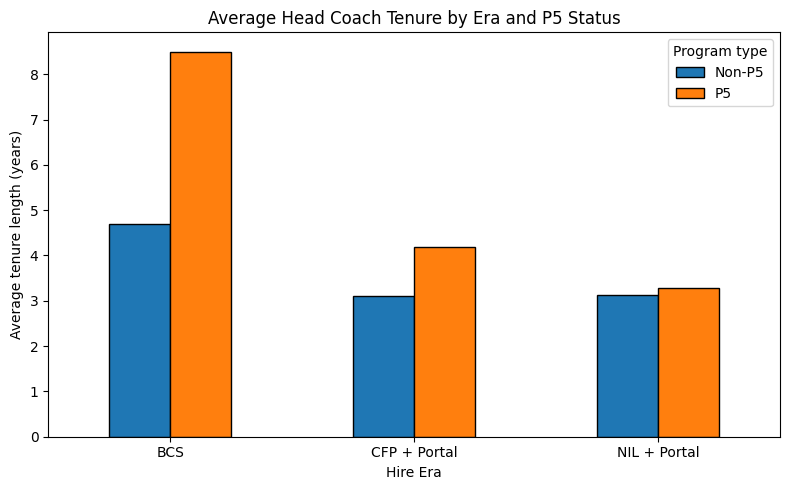

In [11]:
# 2) Pivot so we can make side-by-side bars
plot_df = summary.pivot(index="hire_era", columns="P5_label", values="mean")

# Ensure eras appear in a logical order (adjust to match your labels)
order = ["BCS", "CFP + Portal", "NIL + Portal"]
plot_df = plot_df.reindex(order)

# 3) Plot
ax = plot_df.plot(
    kind="bar",
    figsize=(8, 5),
    edgecolor="black"
)

ax.set_xlabel("Hire Era")
ax.set_ylabel("Average tenure length (years)")
ax.set_title("Average Head Coach Tenure by Era and P5 Status")
ax.legend(title="Program type")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [12]:
import pandas as pd
import statsmodels.formula.api as smf

# Modern era = CFP + Portal OR NIL + Portal
stints["is_modern_era_2018_present"] = stints["hire_era"].isin(
    ["CFP + Portal", "NIL + Portal"]
).astype(int)

# Drop rows with missing key vars
df_model = stints.dropna(subset=["tenure_len", "tenure_win_pct"])

# --- 1. Full model (what you already had) ---
formula_full = "tenure_len ~ tenure_win_pct + is_p5 * is_modern_era_2018_present + nat_titles"
model_full = smf.ols(formula_full, data=df_model).fit(cov_type="HC3")

# --- 2. Interaction-only (no win% or nat_titles) ---
formula_int = "tenure_len ~ is_p5 * is_modern_era_2018_present"
model_int = smf.ols(formula_int, data=df_model).fit(cov_type="HC3")

# --- 3. Additive only (no interaction term) ---
formula_add = "tenure_len ~ is_p5 + is_modern_era_2018_present"
model_add = smf.ols(formula_add, data=df_model).fit(cov_type="HC3")

# Look at each
print("\n=== Full model ===")
print(model_full.summary())

print("\n=== Interaction-only model ===")
print(model_int.summary())

print("\n=== Additive (no interaction) model ===")
print(model_add.summary())



=== Full model ===
                            OLS Regression Results                            
Dep. Variable:             tenure_len   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     8.286
Date:                Wed, 05 Nov 2025   Prob (F-statistic):           4.90e-07
Time:                        22:36:45   Log-Likelihood:                -525.98
No. Observations:                 178   AIC:                             1064.
Df Residuals:                     172   BIC:                             1083.
Df Model:                           5                                         
Covariance Type:                  HC3                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [13]:
def starify(p):
    if p < 0.01:
        return "***"
    elif p < 0.05:
        return "**"
    elif p < 0.10:
        return "*"
    else:
        return ""

def reg_table_with_stars(model, digits=3):
    coef = model.params
    se = model.bse
    tval = model.tvalues
    pval = model.pvalues

    df = pd.DataFrame({
        "coef": coef,
        "std_err": se,
        "t": tval,
        "p>|t|": pval,
        "stars": [starify(p) for p in pval]
    })
    num_cols = ["coef", "std_err", "t", "p>|t|"]
    df[num_cols] = df[num_cols].round(digits)
    return df

print("=== Full model ===")
print(reg_table_with_stars(model_full).to_string(), "\n")

print("=== Interaction-only model ===")
print(reg_table_with_stars(model_int).to_string(), "\n")

print("=== Additive (no interaction) model ===")
print(reg_table_with_stars(model_add).to_string())



=== Full model ===
                                   coef  std_err      t  p>|t| stars
Intercept                         3.010    1.052  2.861  0.004   ***
tenure_win_pct                    2.402    1.515  1.585  0.113      
is_p5                             2.950    1.007  2.931  0.003   ***
is_modern_era_2018_present       -1.270    0.658 -1.932  0.053     *
is_p5:is_modern_era_2018_present -2.481    1.056 -2.349  0.019    **
nat_titles                        2.703    2.081  1.299  0.194       

=== Interaction-only model ===
                                   coef  std_err      t  p>|t| stars
Intercept                         4.565    0.563  8.112  0.000   ***
is_p5                             3.920    1.034  3.793  0.000   ***
is_modern_era_2018_present       -1.330    0.638 -2.085  0.037    **
is_p5:is_modern_era_2018_present -3.534    1.103 -3.203  0.001   *** 

=== Additive (no interaction) model ===
                             coef  std_err       t  p>|t| stars
Intercept     

In [14]:
import pandas as pd
import numpy as np

def starify(p):
    if p < 0.01:
        return "***"
    elif p < 0.05:
        return "**"
    elif p < 0.10:
        return "*"
    else:
        return ""

def make_reg_table(models, model_names=None, dep_var_name="tenure_len", digits=3):
    """
    models: list of statsmodels results (e.g., [model_full, model_int, model_add])
    model_names: list of strings for column headers (same length as models)
    """
    if model_names is None:
        model_names = [f"({i+1})" for i in range(len(models))]

    # Collect all parameter names across models
    all_params = set()
    for m in models:
        all_params.update(m.params.index.tolist())
    all_params = list(all_params)

    # Put Constant at top if present
    if "Intercept" in all_params:
        all_params.remove("Intercept")
        all_params = ["Intercept"] + all_params

    # Map name for pretty printing
    def pretty_name(name):
        if name == "Intercept":
            return "Constant"
        # customize any renaming here if you want nicer labels
        return name

    # Build table rows: for each param, we will store coef row and se row
    rows = []

    for param in all_params:
        coef_row = [pretty_name(param)]
        se_row   = [""]
        for m in models:
            if param in m.params.index:
                coef = m.params[param]
                se   = m.bse[param]
                pval = m.pvalues[param]

                coef_str = f"{coef:.{digits}f}{starify(pval)}"
                se_str   = f"({se:.{digits}f})"
            else:
                coef_str = ""
                se_str   = ""

            coef_row.append(coef_str)
            se_row.append(se_str)

        rows.append(coef_row)
        rows.append(se_row)

    # Bottom stats: Observations, R2, Adjusted R2
    obs_row = ["Observations"]
    r2_row  = ["R2"]
    r2a_row = ["Adjusted R2"]

    for m in models:
        obs_row.append(f"{int(m.nobs):,}")
        r2_row.append(f"{m.rsquared:.3f}")
        r2a_row.append(f"{m.rsquared_adj:.3f}")

    rows.append([""] * len(rows[0]))   # blank line
    rows.append(obs_row)
    rows.append(r2_row)
    rows.append(r2a_row)

    # Turn into DataFrame for nice printing
    columns = [""] + model_names
    table_df = pd.DataFrame(rows, columns=columns)

    # Build header string similar to your example
    top_border = "=" * 60
    header1 = f"{'Dependent variable:':^60}"
    header2 = f"{dep_var_name:^60}"
    model_header = " " * 20 + " ".join([f"{name:^10}" for name in model_names])
    mid_border = "-" * 60

    print(top_border)
    print(header1)
    print(header2)
    print(model_header)
    print(mid_border)
    print(table_df.to_string(index=False))
    print(top_border)
    print("Note:                      *p<0.1; **p<0.05; ***p<0.01")

# ---- Use it with your models ----

models = [model_full, model_int, model_add]
model_names = ["(1)", "(2)", "(3)"]  # or ["Full", "Int only", "Additive"]

make_reg_table(models, model_names=model_names, dep_var_name="tenure_len")


                    Dependent variable:                     
                         tenure_len                         
                       (1)        (2)        (3)    
------------------------------------------------------------
                                      (1)       (2)       (3)
                        Constant 3.010***  4.565***  5.221***
                                  (1.052)   (0.563)   (0.503)
                           is_p5 2.950***  3.920***  2.833***
                                  (1.007)   (1.034)   (0.741)
      is_modern_era_2018_present  -1.270*  -1.330** -3.762***
                                  (0.658)   (0.638)   (0.669)
is_p5:is_modern_era_2018_present -2.481** -3.534***          
                                  (1.056)   (1.103)          
                      nat_titles    2.703                    
                                  (2.081)                    
                  tenure_win_pct    2.402                    
                    

In [15]:
# You already defined df_model and ran:
formula_full = "tenure_len ~ tenure_win_pct + is_p5 * is_modern_era_2018_present + nat_titles"
model_full = smf.ols(formula_full, data=df_model).fit(cov_type="HC3")

formula_int = "tenure_len ~ is_p5 * is_modern_era_2018_present"
model_int = smf.ols(formula_int, data=df_model).fit(cov_type="HC3")

formula_add = "tenure_len ~ is_p5 + is_modern_era_2018_present"
model_add = smf.ols(formula_add, data=df_model).fit(cov_type="HC3")

# Then just:
models = [model_full, model_int, model_add]
make_reg_table(models, model_names=["(1)", "(2)", "(3)"], dep_var_name="tenure_len")


                    Dependent variable:                     
                         tenure_len                         
                       (1)        (2)        (3)    
------------------------------------------------------------
                                      (1)       (2)       (3)
                        Constant 3.010***  4.565***  5.221***
                                  (1.052)   (0.563)   (0.503)
                           is_p5 2.950***  3.920***  2.833***
                                  (1.007)   (1.034)   (0.741)
      is_modern_era_2018_present  -1.270*  -1.330** -3.762***
                                  (0.658)   (0.638)   (0.669)
is_p5:is_modern_era_2018_present -2.481** -3.534***          
                                  (1.056)   (1.103)          
                      nat_titles    2.703                    
                                  (2.081)                    
                  tenure_win_pct    2.402                    
                    

In [16]:
import pandas as pd

def starify(p):
    if p < 0.01:
        return "***"
    elif p < 0.05:
        return "**"
    elif p < 0.10:
        return "*"
    else:
        return ""

def make_reg_table(models, model_names=None, dep_var_name="tenure_len", digits=3):
    if model_names is None:
        model_names = [f"({i+1})" for i in range(len(models))]

    # Collect all parameter names across models
    all_params = set()
    for m in models:
        all_params.update(m.params.index.tolist())
    all_params = list(all_params)

    # Put Constant at top if present
    if "Intercept" in all_params:
        all_params.remove("Intercept")
        all_params = ["Intercept"] + all_params

    # Map internal names to pretty labels
    pretties = {
        "Intercept": "Constant",
        "is_p5": "P5",
        "is_modern_era_2018_present": "Modern era",
        "is_p5:is_modern_era_2018_present": "P5 × Modern era",
        "tenure_win_pct": "Tenure win %",
        "nat_titles": "Nat. titles"
    }

    def pretty_name(name):
        return pretties.get(name, name)

    rows = []

    # Build rows: coef row + se row for each param
    for param in all_params:
        coef_row = [pretty_name(param)]
        se_row   = [""]
        for m in models:
            if param in m.params.index:
                coef = m.params[param]
                se   = m.bse[param]
                pval = m.pvalues[param]

                coef_str = f"{coef:.{digits}f}{starify(pval)}"
                se_str   = f"({se:.{digits}f})"
            else:
                coef_str = ""
                se_str   = ""

            coef_row.append(coef_str)
            se_row.append(se_str)

        rows.append(coef_row)
        rows.append(se_row)

    # Bottom stats
    obs_row = ["Observations"]
    r2_row  = ["R2"]
    r2a_row = ["Adjusted R2"]

    for m in models:
        obs_row.append(f"{int(m.nobs):,}")
        r2_row.append(f"{m.rsquared:.3f}")
        r2a_row.append(f"{m.rsquared_adj:.3f}")

    rows.append([""] * len(rows[0]))
    rows.append(obs_row)
    rows.append(r2_row)
    rows.append(r2a_row)

    # DataFrame
    columns = [""] + model_names
    table_df = pd.DataFrame(rows, columns=columns)

    # Header
    top_border = "=" * 60
    header1 = f"{'Dependent variable:':^60}"
    header2 = f"{dep_var_name:^60}"
    model_header = " " * 20 + " ".join([f"{name:^10}" for name in model_names])
    mid_border = "-" * 60

    print(top_border)
    print(header1)
    print(header2)
    print(model_header)
    print(mid_border)
    print(table_df.to_string(index=False))
    print(top_border)
    print("Note:                      *p<0.1; **p<0.05; ***p<0.01")


In [17]:
models = [model_full, model_int, model_add]
make_reg_table(models, model_names=["(1)", "(2)", "(3)"], dep_var_name="tenure_len")


                    Dependent variable:                     
                         tenure_len                         
                       (1)        (2)        (3)    
------------------------------------------------------------
                     (1)       (2)       (3)
       Constant 3.010***  4.565***  5.221***
                 (1.052)   (0.563)   (0.503)
             P5 2.950***  3.920***  2.833***
                 (1.007)   (1.034)   (0.741)
     Modern era  -1.270*  -1.330** -3.762***
                 (0.658)   (0.638)   (0.669)
P5 × Modern era -2.481** -3.534***          
                 (1.056)   (1.103)          
    Nat. titles    2.703                    
                 (2.081)                    
   Tenure win %    2.402                    
                 (1.515)                    
                                            
   Observations      178       178       178
             R2    0.269     0.171     0.151
    Adjusted R2    0.248     0.157     0.141

                      era_group P5_label      mean  count
0            Modern era (2018+)   Non-P5  3.111111     18
1            Modern era (2018+)       P5  3.622222     45
2  Pre-modern era (1997 - 2017)   Non-P5  4.565217     46
3  Pre-modern era (1997 - 2017)       P5  8.485714     70


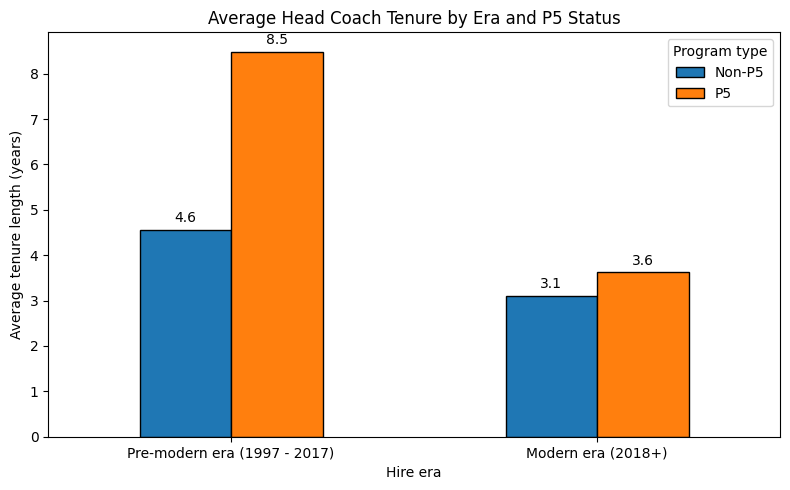

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1) Create a readable era label
stints["era_group"] = np.where(
    stints["is_modern_era_2018_present"] == 1,
    "Modern era (2018+)",
    "Pre-modern era (1997 - 2017)"
)

# 2) Label P5 vs Non-P5
stints["P5_label"] = stints["is_p5"].map({0: "Non-P5", 1: "P5"})

# 3) Collapse to mean tenure length
summary = (
    stints
    .groupby(["era_group", "P5_label"])["tenure_len"]
    .agg(["mean", "count"])
    .reset_index()
)

print(summary)  # sanity check

# 4) Pivot for grouped bar plot
plot_df = summary.pivot(index="era_group", columns="P5_label", values="mean")

# Ensure order on x-axis (string must match EXACTLY)
plot_df = plot_df.reindex(["Pre-modern era (1997 - 2017)", "Modern era (2018+)"])

# 5) Plot
ax = plot_df.plot(
    kind="bar",
    figsize=(8, 5),
    edgecolor="black"
)

ax.set_xlabel("Hire era")
ax.set_ylabel("Average tenure length (years)")
ax.set_title("Average Head Coach Tenure by Era and P5 Status")
ax.legend(title="Program type")
plt.xticks(rotation=0)

# Optional: add value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f", padding=3)

plt.tight_layout()
plt.show()



In [19]:
analysis_df.loc[
    (analysis_df["Coach"] == "James Franklin") &
    (analysis_df["Team"] == "Penn State"),
    ["Coach", "Team", "Year", "HC_Tenure_Year_Team", "Era"]
]


,Coach,Team,Year,HC_Tenure_Year_Team,Era
348,James Franklin,Penn State,2014,1,CFP (pre-Portal)
349,James Franklin,Penn State,2015,2,CFP (pre-Portal)
350,James Franklin,Penn State,2016,3,CFP (pre-Portal)
351,James Franklin,Penn State,2017,4,CFP (pre-Portal)
352,James Franklin,Penn State,2018,5,CFP + Portal
353,James Franklin,Penn State,2019,6,CFP + Portal
354,James Franklin,Penn State,2020,7,CFP + Portal
355,James Franklin,Penn State,2021,8,NIL + Portal
356,James Franklin,Penn State,2022,9,NIL + Portal
357,James Franklin,Penn State,2023,10,NIL + Portal


In [20]:
stints["is_modern_era_2018_present"] = stints["hire_era"].isin(
    ["CFP + Portal", "NIL + Portal"]
).astype(int)


In [21]:
stints["is_modern_era_2018_present"] == 1


0       True
1       True
2      False
3       True
4       True
       ...  
174     True
175     True
176    False
177    False
178    False
Name: is_modern_era_2018_present, Length: 179, dtype: bool

In [22]:
modern_stints = (
    stints[stints["is_modern_era_2018_present"] == 1]
    .loc[:, ["Coach", "Team", "first_year", "last_year", "tenure_len", "is_p5"]]
    .sort_values(["is_p5", "first_year", "Coach"])
)

modern_stints.head(20)


,Coach,Team,first_year,last_year,tenure_len,is_p5
4,Billy Napier,Louisiana,2018,2021,4,0
6,Bob Chesney,Holy Cross,2018,2023,6,0
82,Josh Heupel,UCF,2018,2020,3,0
35,Curt Cignetti,James Madison,2019,2023,5,0
50,Eliah Drinkwitz,Appalachian State,2019,2019,1,0
166,Troy Taylor,Sacramento State,2019,2022,3,0
43,Deion Sanders,Jackson State,2020,2022,3,0
85,Kalen DeBoer,Fresno State,2020,2021,2,0
165,Troy Taylor,No team—COVID-19,2020,2020,1,0
174,Willie Taggart,Florida Atlantic,2020,2022,3,0


In [23]:
# latest season in your dataset
latest_year = analysis_df["Year"].max()

stints["is_ongoing"] = (stints["last_year"] == latest_year).astype(int)

# How many modern-era stints are still ongoing?
stints.groupby(["is_modern_era_2018_present", "is_ongoing"])["Coach"].count()


is_modern_era_2018_present  is_ongoing
0                           0             103
                            1              13
1                           0              27
                            1              36
Name: Coach, dtype: int64

In [24]:
# latest year in the data
latest_year = analysis_df["Year"].max()

# mark ongoing stints
stints["is_ongoing"] = (stints["last_year"] == latest_year).astype(int)

# keep only completed tenures
stints_complete = stints[stints["is_ongoing"] == 0].copy()

# re-run the summary and regression on stints_complete


In [25]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Assuming you still have analysis_df and stints built

# Latest year in your season-level data
latest_year = analysis_df["Year"].max()

# Mark ongoing stints (coach still there in the latest year)
stints["is_ongoing"] = (stints["last_year"] == latest_year).astype(int)

# Keep only completed tenures
stints_complete = stints[stints["is_ongoing"] == 0].copy()

print(stints_complete.shape)
stints_complete.head()


(130, 20)


,Coach,Team,tenure_len,first_year,last_year,hire_era,tier,level,conference,total_wins,total_losses,nat_titles,nat_appear,tenure_win_pct,is_p5,is_fbs,is_modern_era_2018_present,era_group,P5_label,is_ongoing
2,Bill O'Brien,Penn State,2,2012,2013,BCS,P5,FBS,Big Ten,15.0,9.0,0,0,0.625000,1,1,0,Pre-modern era (1997 - 2017),P5,0
4,Billy Napier,Louisiana,4,2018,2021,CFP + Portal,G5,FBS,Sun Belt,40.0,12.0,0,0,0.769231,0,1,1,Modern era (2018+),Non-P5,0
5,Bob Chesney,Assumption,5,2013,2017,BCS,D2,D2,NE10,44.0,16.0,0,0,0.733333,0,0,0,Pre-modern era (1997 - 2017),Non-P5,0
6,Bob Chesney,Holy Cross,6,2018,2023,CFP + Portal,FCS,FCS,Patriot,44.0,21.0,0,0,0.676923,0,0,1,Modern era (2018+),Non-P5,0
8,Bob Chesney,Salve Regina,3,2010,2012,BCS,D3,D3,CCC,23.0,9.0,0,0,0.718750,0,0,0,Pre-modern era (1997 - 2017),Non-P5,0


In [26]:
# Modern era = CFP + Portal OR NIL + Portal (based on hire era)
stints_complete["is_modern_era_2018_present"] = stints_complete["hire_era"].isin(
    ["CFP + Portal", "NIL + Portal"]
).astype(int)

# Drop rows missing key vars
df_model_complete = stints_complete.dropna(
    subset=["tenure_len", "tenure_win_pct", "is_p5", "nat_titles"]
)


In [27]:
# 1) Full model
formula_full = "tenure_len ~ tenure_win_pct + is_p5 * is_modern_era_2018_present + nat_titles"
model_full_c = smf.ols(formula_full, data=df_model_complete).fit(cov_type="HC3")

# 2) Interaction-only
formula_int = "tenure_len ~ is_p5 * is_modern_era_2018_present"
model_int_c = smf.ols(formula_int, data=df_model_complete).fit(cov_type="HC3")

# 3) Additive only
formula_add = "tenure_len ~ is_p5 + is_modern_era_2018_present"
model_add_c = smf.ols(formula_add, data=df_model_complete).fit(cov_type="HC3")


In [28]:
def starify(p):
    if p < 0.01:
        return "***"
    elif p < 0.05:
        return "**"
    elif p < 0.10:
        return "*"
    else:
        return ""

def make_reg_table(models, model_names=None, dep_var_name="tenure_len", digits=3):
    if model_names is None:
        model_names = [f"({i+1})" for i in range(len(models))]

    # Collect all parameter names
    all_params = set()
    for m in models:
        all_params.update(m.params.index.tolist())
    all_params = list(all_params)

    if "Intercept" in all_params:
        all_params.remove("Intercept")
        all_params = ["Intercept"] + all_params

    pretties = {
        "Intercept": "Constant",
        "is_p5": "P5",
        "is_modern_era_2018_present": "Modern era",
        "is_p5:is_modern_era_2018_present": "P5 × Modern era",
        "tenure_win_pct": "Tenure win %",
        "nat_titles": "Nat. titles"
    }

    def pretty_name(name):
        return pretties.get(name, name)

    rows = []
    for param in all_params:
        coef_row = [pretty_name(param)]
        se_row   = [""]
        for m in models:
            if param in m.params.index:
                coef = m.params[param]
                se   = m.bse[param]
                pval = m.pvalues[param]

                coef_str = f"{coef:.{digits}f}{starify(pval)}"
                se_str   = f"({se:.{digits}f})"
            else:
                coef_str = ""
                se_str   = ""
            coef_row.append(coef_str)
            se_row.append(se_str)
        rows.append(coef_row)
        rows.append(se_row)

    obs_row = ["Observations"]
    r2_row  = ["R2"]
    r2a_row = ["Adjusted R2"]
    for m in models:
        obs_row.append(f"{int(m.nobs):,}")
        r2_row.append(f"{m.rsquared:.3f}")
        r2a_row.append(f"{m.rsquared_adj:.3f}")

    rows.append([""] * len(rows[0]))
    rows.append(obs_row)
    rows.append(r2_row)
    rows.append(r2a_row)

    columns = [""] + model_names
    table_df = pd.DataFrame(rows, columns=columns)

    top_border = "=" * 60
    header1 = f"{'Dependent variable:':^60}"
    header2 = f"{dep_var_name:^60}"
    model_header = " " * 20 + " ".join([f"{name:^10}" for name in model_names])
    mid_border = "-" * 60

    print(top_border)
    print(header1)
    print(header2)
    print(model_header)
    print(mid_border)
    print(table_df.to_string(index=False))
    print(top_border)
    print("Note:                      *p<0.1; **p<0.05; ***p<0.01")

models_c = [model_full_c, model_int_c, model_add_c]
make_reg_table(models_c, model_names=["(1)", "(2)", "(3)"], dep_var_name="tenure_len")


                    Dependent variable:                     
                         tenure_len                         
                       (1)        (2)        (3)    
------------------------------------------------------------
                    (1)       (2)       (3)
       Constant   2.074  4.205***  4.598***
                (1.268)   (0.422)   (0.405)
             P5 2.424**  3.490***  2.803***
                (1.069)   (1.058)   (0.869)
     Modern era -1.181*    -1.005 -3.131***
                (0.688)   (0.648)   (0.741)
P5 × Modern era  -1.746 -3.503***          
                (1.177)   (1.238)          
    Nat. titles   2.919                    
                (3.017)                    
   Tenure win %  3.295*                    
                (1.979)                    
                                           
   Observations     129       129       129
             R2   0.255     0.122     0.107
    Adjusted R2   0.225     0.101     0.093
Note:           

                      era_group P5_label      mean  count
0            Modern era (2018+)   Non-P5  3.000000     11
1            Modern era (2018+)       P5  3.187500     16
2  Pre-modern era (1997 - 2017)   Non-P5  4.204545     44
3  Pre-modern era (1997 - 2017)       P5  7.694915     59


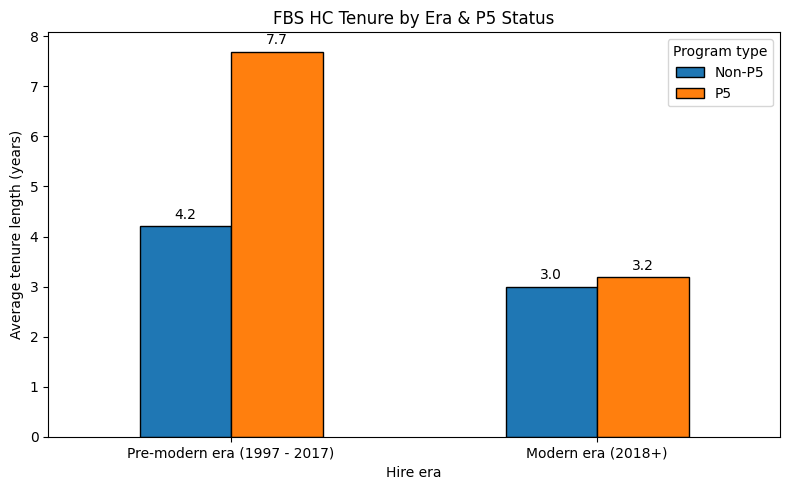

In [32]:
# Era labels based on hire era
stints_complete["era_group"] = np.where(
    stints_complete["is_modern_era_2018_present"] == 1,
    "Modern era (2018+)",
    "Pre-modern era (1997 - 2017)"
)

stints_complete["P5_label"] = stints_complete["is_p5"].map({0: "Non-P5", 1: "P5"})

summary_c = (
    stints_complete
    .groupby(["era_group", "P5_label"])["tenure_len"]
    .agg(["mean", "count"])
    .reset_index()
)

print(summary_c)

plot_df_c = summary_c.pivot(index="era_group", columns="P5_label", values="mean")
plot_df_c = plot_df_c.reindex(["Pre-modern era (1997 - 2017)", "Modern era (2018+)"])

ax = plot_df_c.plot(
    kind="bar",
    figsize=(8, 5),
    edgecolor="black"
)

ax.set_xlabel("Hire era")
ax.set_ylabel("Average tenure length (years)")
ax.set_title("FBS HC Tenure by Era & P5 Status")
ax.legend(title="Program type")
plt.xticks(rotation=0)

for container in ax.containers:
    ax.bar_label(container, fmt="%.1f", padding=3)

plt.tight_layout()
plt.show()


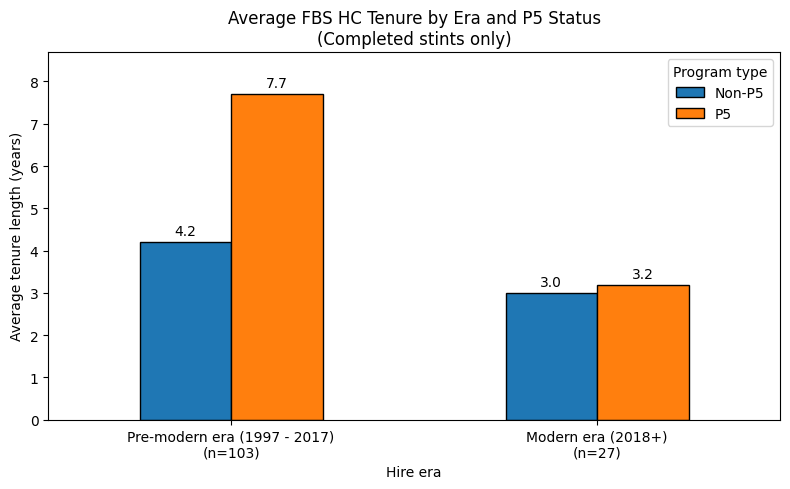

In [33]:
import matplotlib.pyplot as plt

# summary_c has: era_group, P5_label, mean, count
# plot_df_c is pivoted means:
#   index = era_group, columns = P5_label, values = mean

# 1) Get n per era (sum of counts across P5 + Non-P5)
era_counts = summary_c.groupby("era_group")["count"].sum()

# 2) Order eras
order = ["Pre-modern era (1997 - 2017)", "Modern era (2018+)"]
plot_df_c = plot_df_c.reindex(order)

# 3) Build new x-tick labels with n
xtick_labels = [
    f"{era}\n(n={era_counts[era]})"
    for era in order
]

# 4) Plot
ax = plot_df_c.plot(
    kind="bar",
    figsize=(8, 5),
    edgecolor="black"
)

ax.set_xlabel("Hire era")
ax.set_ylabel("Average tenure length (years)")
ax.set_title("Average FBS HC Tenure by Era and P5 Status\n(Completed stints only)")
ax.legend(title="Program type")

# apply new x-tick labels
ax.set_xticklabels(xtick_labels, rotation=0)

# 5) Raise y-axis max a bit so labels aren't cramped
ymax = plot_df_c.values.max()
ax.set_ylim(0, ymax + 1)   # adds 1 year of headroom

# 6) Value labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f", padding=3)

plt.tight_layout()
plt.show()


In [34]:
# This is the summary you already computed for completed stints
# columns: era_group, P5_label, mean, count
print(summary_c)

# 1) Total stints per era (P5 + Non-P5 combined)
era_counts = summary_c.groupby("era_group")["count"].sum()
print("\nTotal completed stints per era:")
print(era_counts)

# 2) Stints per era x P5 (if you want to sanity check further)
print("\nCompleted stints per era x P5:")
print(summary_c.pivot(index="era_group", columns="P5_label", values="count"))


                      era_group P5_label      mean  count
0            Modern era (2018+)   Non-P5  3.000000     11
1            Modern era (2018+)       P5  3.187500     16
2  Pre-modern era (1997 - 2017)   Non-P5  4.204545     44
3  Pre-modern era (1997 - 2017)       P5  7.694915     59

Total completed stints per era:
era_group
Modern era (2018+)               27
Pre-modern era (1997 - 2017)    103
Name: count, dtype: int64

Completed stints per era x P5:
P5_label                      Non-P5  P5
era_group                               
Modern era (2018+)                11  16
Pre-modern era (1997 - 2017)      44  59


In [38]:
# Core stint table
cols = [
    "Coach", "Team",
    "first_year", "last_year", "tenure_len",
    "hire_era", "tier", "level", "conference",
    "tenure_win_pct", "nat_titles",
    "is_p5", "is_modern_era_2018_present", "is_ongoing"
]

# keep only columns that exist, in that order
cols = [c for c in cols if c in stints.columns]

stints[cols].sort_values(["first_year", "Coach", "Team"]).head(20)


,Coach,Team,first_year,last_year,tenure_len,hire_era,tier,level,conference,tenure_win_pct,nat_titles,is_p5,is_modern_era_2018_present,is_ongoing
80,Joe Paterno,Penn State,1966,2011,46,Pre-BCS,P5,FBS,Independent,0.750459,2,1,0,0
104,Lou Holtz,William & Mary,1969,1971,3,Pre-BCS,FCS,FCS,SoCon,0.393939,0,0,0,0
101,Lou Holtz,NC State,1972,1975,4,Pre-BCS,P5,FBS,ACC,0.733333,0,1,0,0
99,Lou Holtz,Arkansas,1977,1983,7,Pre-BCS,P5,FBS,SWC,0.740741,0,1,0,0
52,Frank Beamer,Murray State,1981,1986,6,Pre-BCS,FCS,FCS,OVC,0.646154,0,0,0,0
108,Mack Brown,Appalachian State,1983,1983,1,Pre-BCS,FCS,FCS,SoCon,0.545455,0,0,0,0
100,Lou Holtz,Minnesota,1984,1985,2,Pre-BCS,P5,FBS,Big Ten,0.454545,0,1,0,0
111,Mack Brown,Tulane,1985,1987,3,Pre-BCS,P5,FBS,Independent,0.323529,0,1,0,0
72,Jim Tressel,Youngstown State,1986,2000,15,Pre-BCS,FCS,FCS,MVFC,0.703125,0,0,0,0
102,Lou Holtz,Notre Dame,1986,1996,11,Pre-BCS,P5,FBS,Independent,0.769231,1,1,0,0


In [39]:
stints_complete = stints[stints["is_ongoing"] == 0].copy()

stints_complete[cols].sort_values(
    ["is_modern_era_2018_present", "is_p5", "first_year", "Coach"]
).head(25)


,Coach,Team,first_year,last_year,tenure_len,hire_era,tier,level,conference,tenure_win_pct,nat_titles,is_p5,is_modern_era_2018_present,is_ongoing
104,Lou Holtz,William & Mary,1969,1971,3,Pre-BCS,FCS,FCS,SoCon,0.393939,0,0,0,0
52,Frank Beamer,Murray State,1981,1986,6,Pre-BCS,FCS,FCS,OVC,0.646154,0,0,0,0
108,Mack Brown,Appalachian State,1983,1983,1,Pre-BCS,FCS,FCS,SoCon,0.545455,0,0,0,0
72,Jim Tressel,Youngstown State,1986,2000,15,Pre-BCS,FCS,FCS,MVFC,0.703125,0,0,0,0
143,Nick Saban,Toledo,1990,1990,1,Pre-BCS,G5,FBS,MAC,0.818182,0,0,0,0
21,Brian Kelly,Grand Valley State,1991,2003,13,Pre-BCS,D2,D2,GLIAC,0.771242,0,0,0,0
149,Sam Pittman,Hutchinson,1992,1993,2,Pre-BCS,Other,Other,Jayhawk,0.550000,0,0,0,0
45,Don Brown,Plymouth State,1993,1995,3,Pre-BCS,D3,D3,MASCAC,0.806452,0,0,0,0
44,Don Brown,Northeastern,2000,2003,4,BCS,FCS,FCS,CAA,0.574468,0,0,0,0
168,Urban Meyer,Bowling Green,2001,2002,2,BCS,G5,FBS,MAC,0.739130,0,0,0,0


In [40]:
import pandas as pd

# Optional: widen display so it doesn't wrap badly
pd.set_option("display.max_rows", None)   # show all rows
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 200)

cols = [
    "Coach", "Team",
    "first_year", "last_year", "tenure_len",
    "hire_era", "tier", "level", "conference",
    "tenure_win_pct", "nat_titles",
    "is_p5", "is_modern_era_2018_present", "is_ongoing"
]
cols = [c for c in cols if c in stints.columns]

stints_all_table = stints[cols].sort_values(
    ["is_modern_era_2018_present", "is_p5", "first_year", "Coach", "Team"]
)

print(stints_all_table.to_string(index=False))


            Coach               Team  first_year  last_year  tenure_len         hire_era  tier level    conference  tenure_win_pct  nat_titles  is_p5  is_modern_era_2018_present  is_ongoing
        Lou Holtz     William & Mary        1969       1971           3          Pre-BCS   FCS   FCS         SoCon        0.393939           0      0                           0           0
     Frank Beamer       Murray State        1981       1986           6          Pre-BCS   FCS   FCS           OVC        0.646154           0      0                           0           0
       Mack Brown  Appalachian State        1983       1983           1          Pre-BCS   FCS   FCS         SoCon        0.545455           0      0                           0           0
      Jim Tressel   Youngstown State        1986       2000          15          Pre-BCS   FCS   FCS          MVFC        0.703125           0      0                           0           0
       Nick Saban             Toledo        1990  

In [42]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# --- 1. Start from your season-level data ---
# assuming this is already loaded:
# analysis_df = pd.read_csv("Coaching_analysis_Data.csv")

analysis_df["Year"] = pd.to_numeric(analysis_df["Year"], errors="coerce")

df = analysis_df.sort_values(["Coach", "Team", "Year"]).copy()

# Identify gaps > 1 year as a new stint for the same coach–team
df["year_diff"] = df.groupby(["Coach", "Team"])["Year"].diff()

df["new_stint_flag"] = (
    df["year_diff"].isna() | (df["year_diff"] > 1)
).astype(int)

# Cumulative stint_id within each coach–team
df["stint_id"] = df.groupby(["Coach", "Team"])["new_stint_flag"].cumsum()

# --- 2. Build stints_fixed: one row per Coach–Team–Stint ---

stints_fixed = (
    df.groupby(["Coach", "Team", "stint_id"], as_index=False)
      .agg(
          tenure_len   = ("HC_Tenure_Year_Team", "max"),
          first_year   = ("Year", "min"),
          last_year    = ("Year", "max"),
          hire_era     = ("Era", "first"),
          tier         = ("Tier", "first"),
          level        = ("Level", "first"),
          conference   = ("Conference", "first"),
          total_wins   = ("Wins", "sum"),
          total_losses = ("Losses", "sum"),
          nat_titles   = ("Nat_Champ_Won", "sum")
      )
)

stints_fixed["tenure_win_pct"] = (
    stints_fixed["total_wins"] /
    (stints_fixed["total_wins"] + stints_fixed["total_losses"])
)

# Flags
stints_fixed["is_p5"] = (stints_fixed["tier"] == "P5").astype(int)
stints_fixed["is_modern_era_2018_present"] = stints_fixed["hire_era"].isin(
    ["CFP + Portal", "NIL + Portal"]
).astype(int)

latest_year = analysis_df["Year"].max()
stints_fixed["is_ongoing"] = (stints_fixed["last_year"] == latest_year).astype(int)

print(stints_fixed.head())


          Coach            Team  stint_id  tenure_len  first_year  last_year      hire_era tier level conference  total_wins  total_losses  nat_titles  tenure_win_pct  is_p5  \
0   Alex Golesh   South Florida         1           3        2023       2025  NIL + Portal   G5   FBS        AAC        20.0          14.0           0        0.588235      0   
1  Bill O'Brien  Boston College         1           2        2024       2025  NIL + Portal   P5   FBS        ACC         8.0          14.0           0        0.363636      1   
2  Bill O'Brien      Penn State         1           2        2012       2013           BCS   P5   FBS    Big Ten        15.0           9.0           0        0.625000      1   
3  Billy Napier         Florida         1           4        2022       2025  NIL + Portal   P5   FBS        SEC        22.0          23.0           0        0.488889      1   
4  Billy Napier       Louisiana         1           4        2018       2021  CFP + Portal   G5   FBS   Sun Belt   

In [43]:
# Keep only completed stints
stints_complete = stints_fixed[stints_fixed["is_ongoing"] == 0].copy()

# quick sanity check
print(stints_complete[[
    "Coach", "Team", "stint_id",
    "first_year", "last_year", "tenure_len",
    "hire_era", "tier", "is_p5", "is_modern_era_2018_present"
]].head())


          Coach          Team  stint_id  first_year  last_year  tenure_len      hire_era tier  is_p5  is_modern_era_2018_present
2  Bill O'Brien    Penn State         1        2012       2013           2           BCS   P5      1                           0
4  Billy Napier     Louisiana         1        2018       2021           4  CFP + Portal   G5      0                           1
5   Bob Chesney    Assumption         1        2013       2017           5           BCS   D2      0                           0
6   Bob Chesney    Holy Cross         1        2018       2023           6  CFP + Portal  FCS      0                           1
8   Bob Chesney  Salve Regina         1        2010       2012           3           BCS   D3      0                           0


In [44]:
# Drop rows missing key vars
df_model_complete = stints_complete.dropna(
    subset=["tenure_len", "tenure_win_pct", "is_p5", "nat_titles"]
)

# (1) Full model
formula_full = "tenure_len ~ tenure_win_pct + is_p5 * is_modern_era_2018_present + nat_titles"
model_full_c = smf.ols(formula_full, data=df_model_complete).fit(cov_type="HC3")

# (2) Interaction only
formula_int = "tenure_len ~ is_p5 * is_modern_era_2018_present"
model_int_c = smf.ols(formula_int, data=df_model_complete).fit(cov_type="HC3")

# (3) Additive (no interaction)
formula_add = "tenure_len ~ is_p5 + is_modern_era_2018_present"
model_add_c = smf.ols(formula_add, data=df_model_complete).fit(cov_type="HC3")

print(model_full_c.summary())
print(model_int_c.summary())
print(model_add_c.summary())


                            OLS Regression Results                            
Dep. Variable:             tenure_len   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     4.013
Date:                Wed, 05 Nov 2025   Prob (F-statistic):            0.00202
Time:                        22:47:59   Log-Likelihood:                -415.51
No. Observations:                 138   AIC:                             843.0
Df Residuals:                     132   BIC:                             860.6
Df Model:                           5                                         
Covariance Type:                  HC3                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [45]:
def starify(p):
    if p < 0.01:
        return "***"
    elif p < 0.05:
        return "**"
    elif p < 0.10:
        return "*"
    else:
        return ""

def make_reg_table(models, model_names=None, dep_var_name="tenure_len", digits=3):
    if model_names is None:
        model_names = [f"({i+1})" for i in range(len(models))]

    # collect all params
    all_params = set()
    for m in models:
        all_params.update(m.params.index.tolist())
    all_params = list(all_params)

    if "Intercept" in all_params:
        all_params.remove("Intercept")
        all_params = ["Intercept"] + all_params

    pretties = {
        "Intercept": "Constant",
        "is_p5": "P5",
        "is_modern_era_2018_present": "Modern era",
        "is_p5:is_modern_era_2018_present": "P5 × Modern era",
        "tenure_win_pct": "Tenure win %",
        "nat_titles": "Nat. titles",
    }

    def pretty_name(name):
        return pretties.get(name, name)

    rows = []
    for param in all_params:
        coef_row = [pretty_name(param)]
        se_row   = [""]
        for m in models:
            if param in m.params.index:
                coef = m.params[param]
                se   = m.bse[param]
                pval = m.pvalues[param]
                coef_str = f"{coef:.{digits}f}{starify(pval)}"
                se_str   = f"({se:.{digits}f})"
            else:
                coef_str = ""
                se_str   = ""
            coef_row.append(coef_str)
            se_row.append(se_str)
        rows.append(coef_row)
        rows.append(se_row)

    obs_row = ["Observations"]
    r2_row  = ["R2"]
    r2a_row = ["Adjusted R2"]
    for m in models:
        obs_row.append(f"{int(m.nobs):,}")
        r2_row.append(f"{m.rsquared:.3f}")
        r2a_row.append(f"{m.rsquared_adj:.3f}")

    rows.append([""] * len(rows[0]))
    rows.append(obs_row)
    rows.append(r2_row)
    rows.append(r2a_row)

    columns = [""] + model_names
    table_df = pd.DataFrame(rows, columns=columns)

    top_border = "=" * 60
    header1 = f"{'Dependent variable:':^60}"
    header2 = f"{dep_var_name:^60}"
    model_header = " " * 20 + " ".join([f"{name:^10}" for name in model_names])
    mid_border = "-" * 60

    print(top_border)
    print(header1)
    print(header2)
    print(model_header)
    print(mid_border)
    print(table_df.to_string(index=False))
    print(top_border)
    print("Note:                      *p<0.1; **p<0.05; ***p<0.01")

models_c = [model_full_c, model_int_c, model_add_c]
make_reg_table(models_c, model_names=["(1)", "(2)", "(3)"], dep_var_name="tenure_len")


                    Dependent variable:                     
                         tenure_len                         
                       (1)        (2)        (3)    
------------------------------------------------------------
                    (1)      (2)      (3)
       Constant   1.077 4.000*** 4.220***
                (1.595)  (0.407)  (0.407)
             P5 2.461** 3.419*** 3.041***
                (1.016)  (1.009)  (0.833)
     Modern era  -0.935   -0.750  -1.793*
                (0.726)  (0.657)  (0.921)
P5 × Modern era   0.080   -1.722         
                (1.662)  (1.604)         
    Nat. titles   2.900                  
                (2.963)                  
   Tenure win %  4.485*                  
                (2.445)                  
                                         
   Observations     138      138      138
             R2   0.232    0.091    0.087
    Adjusted R2   0.203    0.071    0.074
Note:                      *p<0.1; **p<0.05; ***p<

                      era_group P5_label      mean  count
0            Modern era (2018+)   Non-P5  3.076923     13
1            Modern era (2018+)       P5  4.947368     19
2  Pre-modern era (1997 - 2017)   Non-P5  4.000000     45
3  Pre-modern era (1997 - 2017)       P5  7.419355     62


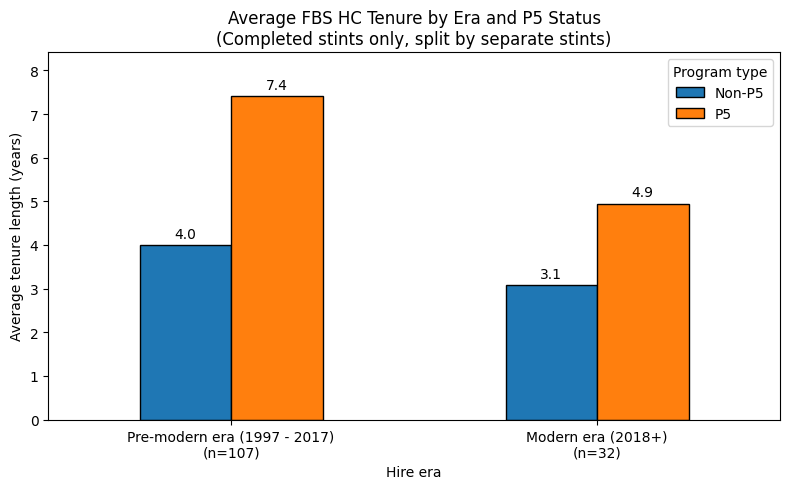

In [46]:
# Era labels based on hire era
stints_complete["era_group"] = np.where(
    stints_complete["is_modern_era_2018_present"] == 1,
    "Modern era (2018+)",
    "Pre-modern era (1997 - 2017)"
)

stints_complete["P5_label"] = stints_complete["is_p5"].map({0: "Non-P5", 1: "P5"})

summary_c = (
    stints_complete
    .groupby(["era_group", "P5_label"])["tenure_len"]
    .agg(["mean", "count"])
    .reset_index()
)

print(summary_c)

plot_df_c = summary_c.pivot(index="era_group", columns="P5_label", values="mean")
order = ["Pre-modern era (1997 - 2017)", "Modern era (2018+)"]
plot_df_c = plot_df_c.reindex(order)

# total n per era for labels
era_counts = summary_c.groupby("era_group")["count"].sum()
xtick_labels = [
    f"{era}\n(n={era_counts[era]})"
    for era in order
]

ax = plot_df_c.plot(
    kind="bar",
    figsize=(8, 5),
    edgecolor="black"
)

ax.set_xlabel("Hire era")
ax.set_ylabel("Average tenure length (years)")
ax.set_title("Average FBS HC Tenure by Era and P5 Status\n(Completed stints only, split by separate stints)")
ax.legend(title="Program type")

ax.set_xticklabels(xtick_labels, rotation=0)

# give headroom above tallest bar
ymax = plot_df_c.values.max()
ax.set_ylim(0, ymax + 1)

for container in ax.containers:
    ax.bar_label(container, fmt="%.1f", padding=3)

plt.tight_layout()
plt.show()


In [47]:
stints_complete.groupby(
    ["is_modern_era_2018_present", "is_p5"]
)["tenure_len"].agg(["mean", "count"])


mean  count
is_modern_era_2018_present is_p5                 
0                          0      4.000000     45
                           1      7.419355     62
1                          0      3.076923     13
                           1      4.947368     19

In [49]:
import pandas as pd

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 200)

cols = [
    "Coach", "Team", "stint_id",
    "first_year", "last_year", "tenure_len",
    "hire_era", "tier", "level", "conference",
    "tenure_win_pct", "nat_titles",
    "is_p5", "is_modern_era_2018_present", "is_ongoing"
]
cols = [c for c in cols if c in df_model_complete.columns]

stints_used = df_model_complete[cols].sort_values(
    ["Coach", "first_year", "Team", "stint_id"]
)

print(stints_used.to_string(index=False))


          Coach               Team  stint_id  first_year  last_year  tenure_len         hire_era  tier level    conference  tenure_win_pct  nat_titles  is_p5  is_modern_era_2018_present  is_ongoing
   Bill O'Brien         Penn State         1        2012       2013           2              BCS    P5   FBS       Big Ten        0.625000           0      1                           0           0
   Billy Napier          Louisiana         1        2018       2021           4     CFP + Portal    G5   FBS      Sun Belt        0.769231           0      0                           1           0
    Bob Chesney       Salve Regina         1        2010       2012           3              BCS    D3    D3           CCC        0.718750           0      0                           0           0
    Bob Chesney         Assumption         1        2013       2017           5              BCS    D2    D2          NE10        0.733333           0      0                           0           0
    Bob Ch

Franklin PSU stint:
             Coach        Team  stint_id  first_year  last_year  tenure_len  is_ongoing
66  James Franklin  Penn State         1        2014       2025          12           0

Brady Hoke SDSU stints:
         Coach             Team  stint_id  first_year  last_year  tenure_len  is_ongoing
13  Brady Hoke  San Diego State         1        2009       2010           2           0
14  Brady Hoke  San Diego State         2        2020       2023           4           0
                            OLS Regression Results                            
Dep. Variable:             tenure_len   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     5.245
Date:                Wed, 05 Nov 2025   Prob (F-statistic):           0.000199
Time:                        23:08:50   Log-Likelihood:                -411.72
No. Observations:                 139 

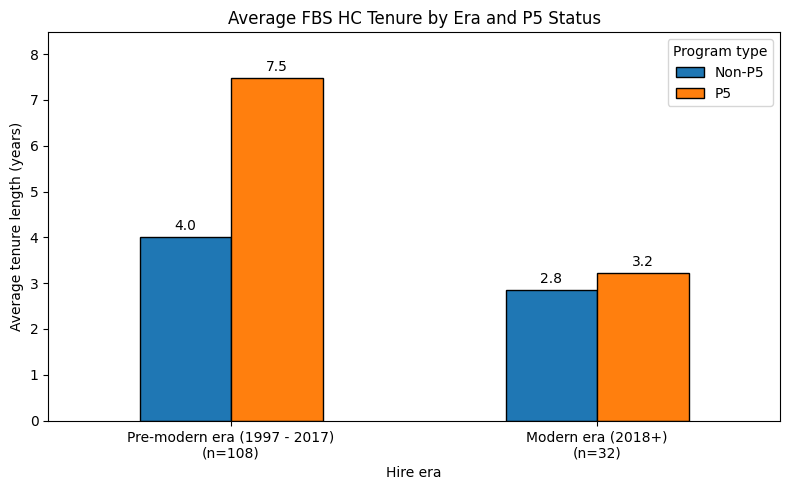

In [52]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# =========================
# 1. Build stints_fixed
# =========================

# Load / prep season-level data
# analysis_df = pd.read_csv("Coaching_analysis_Data.csv")
analysis_df["Year"] = pd.to_numeric(analysis_df["Year"], errors="coerce")

df = analysis_df.sort_values(["Coach", "Team", "Year"]).copy()

# Identify new stints when there's a gap > 1 year for the same coach–team
df["year_diff"] = df.groupby(["Coach", "Team"])["Year"].diff()
df["new_stint_flag"] = (df["year_diff"].isna() | (df["year_diff"] > 1)).astype(int)

# Running stint_id within each coach–team
df["stint_id"] = df.groupby(["Coach", "Team"])["new_stint_flag"].cumsum()

# Aggregate to stints
stints_fixed = (
    df.groupby(["Coach", "Team", "stint_id"], as_index=False)
      .agg(
          first_year   = ("Year", "min"),
          last_year    = ("Year", "max"),
          hire_era     = ("Era", "first"),
          tier         = ("Tier", "first"),
          level        = ("Level", "first"),
          conference   = ("Conference", "first"),
          total_wins   = ("Wins", "sum"),
          total_losses = ("Losses", "sum"),
          nat_titles   = ("Nat_Champ_Won", "sum")
      )
)

# Correct tenure length: last_year - first_year + 1
stints_fixed["tenure_len"] = (
    stints_fixed["last_year"] - stints_fixed["first_year"] + 1
)

# Tenure win %
stints_fixed["tenure_win_pct"] = (
    stints_fixed["total_wins"] /
    (stints_fixed["total_wins"] + stints_fixed["total_losses"])
)

# Flags
stints_fixed["is_p5"] = (stints_fixed["tier"] == "P5").astype(int)
stints_fixed["is_modern_era_2018_present"] = stints_fixed["hire_era"].isin(
    ["CFP + Portal", "NIL + Portal"]
).astype(int)

# Mark ongoing stints by last_year = latest year in data
latest_year = analysis_df["Year"].max()
stints_fixed["is_ongoing"] = (stints_fixed["last_year"] == latest_year).astype(int)

# =========================
# 2. Patch: Franklin at PSU is *not* ongoing
# =========================

stints_fixed.loc[
    (stints_fixed["Coach"] == "James Franklin") &
    (stints_fixed["Team"] == "Penn State"),
    "is_ongoing"
] = 0

# (add more overrides here if you know other 2025 firings)

# =========================
# 3. Completed stints dataset for regression/plot
# =========================

stints_complete = stints_fixed[stints_fixed["is_ongoing"] == 0].copy()

df_model_complete = stints_complete.dropna(
    subset=["tenure_len", "tenure_win_pct", "is_p5", "nat_titles"]
)

# Quick sanity check for Franklin + Brady Hoke SDSU
print("Franklin PSU stint:")
print(
    stints_complete.loc[
        (stints_complete["Coach"] == "James Franklin") &
        (stints_complete["Team"] == "Penn State"),
        ["Coach", "Team", "stint_id", "first_year", "last_year", "tenure_len", "is_ongoing"]
    ]
)

print("\nBrady Hoke SDSU stints:")
print(
    stints_complete.loc[
        (stints_complete["Coach"] == "Brady Hoke") &
        (stints_complete["Team"] == "San Diego State"),
        ["Coach", "Team", "stint_id", "first_year", "last_year", "tenure_len", "is_ongoing"]
    ]
)

# =========================
# 4. Re-run regressions
# =========================

# (1) Full model
formula_full = "tenure_len ~ tenure_win_pct + is_p5 * is_modern_era_2018_present + nat_titles"
model_full_c = smf.ols(formula_full, data=df_model_complete).fit(cov_type="HC3")

# (2) Interaction only
formula_int = "tenure_len ~ is_p5 * is_modern_era_2018_present"
model_int_c = smf.ols(formula_int, data=df_model_complete).fit(cov_type="HC3")

# (3) Additive only
formula_add = "tenure_len ~ is_p5 + is_modern_era_2018_present"
model_add_c = smf.ols(formula_add, data=df_model_complete).fit(cov_type="HC3")

print(model_full_c.summary())
print(model_int_c.summary())
print(model_add_c.summary())

# =========================
# 5. Bar chart (completed stints, corrected tenures)
# =========================

stints_complete["era_group"] = np.where(
    stints_complete["is_modern_era_2018_present"] == 1,
    "Modern era (2018+)",
    "Pre-modern era (1997 - 2017)"
)

stints_complete["P5_label"] = stints_complete["is_p5"].map({0: "Non-P5", 1: "P5"})

summary_c = (
    stints_complete
    .groupby(["era_group", "P5_label"])["tenure_len"]
    .agg(["mean", "count"])
    .reset_index()
)

print("\nSummary by era × P5:")
print(summary_c)

plot_df_c = summary_c.pivot(index="era_group", columns="P5_label", values="mean")
order = ["Pre-modern era (1997 - 2017)", "Modern era (2018+)"]
plot_df_c = plot_df_c.reindex(order)

# n per era for x-axis labels
era_counts = summary_c.groupby("era_group")["count"].sum()
xtick_labels = [
    f"{era}\n(n={era_counts[era]})"
    for era in order
]

ax = plot_df_c.plot(
    kind="bar",
    figsize=(8, 5),
    edgecolor="black"
)

ax.set_xlabel("Hire era")
ax.set_ylabel("Average tenure length (years)")
ax.set_title("Average FBS HC Tenure by Era and P5 Status")
ax.legend(title="Program type")

ax.set_xticklabels(xtick_labels, rotation=0)

ymax = plot_df_c.values.max()
ax.set_ylim(0, ymax + 1)

for container in ax.containers:
    ax.bar_label(container, fmt="%.1f", padding=3)

plt.tight_layout()
plt.show()


In [51]:
import pandas as pd

def starify(p):
    if p < 0.01:
        return "***"
    elif p < 0.05:
        return "**"
    elif p < 0.10:
        return "*"
    else:
        return ""

def make_reg_table(models, model_names=None, dep_var_name="tenure_len", digits=3):
    """
    Print a stargazer-style regression table in text form.
    
    models: list of statsmodels results objects
    model_names: list of strings, e.g. ["(1)", "(2)", "(3)"]
    dep_var_name: name for the dependent variable header
    """
    if model_names is None:
        model_names = [f"({i+1})" for i in range(len(models))]

    # Collect all parameter names across models
    all_params = set()
    for m in models:
        all_params.update(m.params.index.tolist())
    all_params = list(all_params)

    # Put Intercept first if present
    if "Intercept" in all_params:
        all_params.remove("Intercept")
        all_params = ["Intercept"] + all_params

    # Pretty labels for nicer output
    pretties = {
        "Intercept": "Constant",
        "is_p5": "P5",
        "is_modern_era_2018_present": "Modern era",
        "is_p5:is_modern_era_2018_present": "P5 × Modern era",
        "tenure_win_pct": "Tenure win %",
        "nat_titles": "Nat. titles",
    }

    def pretty_name(name):
        return pretties.get(name, name)

    rows = []

    # Coefficients and standard errors, stacked
    for param in all_params:
        coef_row = [pretty_name(param)]
        se_row   = [""]
        for m in models:
            if param in m.params.index:
                coef = m.params[param]
                se   = m.bse[param]
                pval = m.pvalues[param]

                coef_str = f"{coef:.{digits}f}{starify(pval)}"
                se_str   = f"({se:.{digits}f})"
            else:
                coef_str = ""
                se_str   = ""
            coef_row.append(coef_str)
            se_row.append(se_str)
        rows.append(coef_row)
        rows.append(se_row)

    # Model-level stats
    obs_row = ["Observations"]
    r2_row  = ["R2"]
    r2a_row = ["Adjusted R2"]
    for m in models:
        obs_row.append(f"{int(m.nobs):,}")
        r2_row.append(f"{m.rsquared:.3f}")
        r2a_row.append(f"{m.rsquared_adj:.3f}")

    rows.append([""] * len(rows[0]))
    rows.append(obs_row)
    rows.append(r2_row)
    rows.append(r2a_row)

    columns = [""] + model_names
    table_df = pd.DataFrame(rows, columns=columns)

    # Pretty header
    top_border = "=" * 60
    header1 = f"{'Dependent variable:':^60}"
    header2 = f"{dep_var_name:^60}"
    model_header = " " * 20 + " ".join([f"{name:^10}" for name in model_names])
    mid_border = "-" * 60

    print(top_border)
    print(header1)
    print(header2)
    print(model_header)
    print(mid_border)
    print(table_df.to_string(index=False))
    print(top_border)
    print("Note:                      *p<0.1; **p<0.05; ***p<0.01")

# After fitting your models:
# model_full_c, model_int_c, model_add_c

models_c = [model_full_c, model_int_c, model_add_c]
make_reg_table(
    models_c,
    model_names=["(1)", "(2)", "(3)"],
    dep_var_name="tenure_len"
)


                    Dependent variable:                     
                         tenure_len                         
                       (1)        (2)        (3)    
------------------------------------------------------------
                    (1)       (2)       (3)
       Constant  2.223*  4.000***  4.417***
                (1.211)   (0.407)   (0.390)
             P5 2.468**  3.476***  2.761***
                (1.008)   (0.998)   (0.800)
     Modern era -1.113*    -1.000 -2.980***
                (0.647)   (0.617)   (0.688)
P5 × Modern era  -1.745 -3.266***          
                (1.138)   (1.170)          
    Nat. titles   3.004                    
                (3.021)                    
   Tenure win %   2.726                    
                (1.862)                    
                                           
   Observations     139       139       139
             R2   0.260     0.126     0.112
    Adjusted R2   0.232     0.107     0.098
Note:           

In [53]:
import pandas as pd

# 1) Rebuild the summary (era x P5)
stints_complete["era_group"] = np.where(
    stints_complete["is_modern_era_2018_present"] == 1,
    "Modern era (2018+)",
    "Pre-modern (1997–2017)"
)

stints_complete["P5_label"] = stints_complete["is_p5"].map({0: "Non-P5", 1: "P5"})

summary = (
    stints_complete
    .groupby(["era_group", "P5_label"])["tenure_len"]
    .agg(["mean", "count"])
    .reset_index()
)

# 2) Build a markdown table for Reddit
lines = []
lines.append("| Hire era              | Program type | Avg tenure (years) | # completed stints |")
lines.append("|-----------------------|--------------|---------------------|--------------------|")

for _, row in summary.iterrows():
    lines.append(
        f"| {row['era_group']} | {row['P5_label']} | {row['mean']:.1f} | {int(row['count'])} |"
    )

markdown_table = "\n".join(lines)
print(markdown_table)


| Hire era              | Program type | Avg tenure (years) | # completed stints |
|-----------------------|--------------|---------------------|--------------------|
| Modern era (2018+) | Non-P5 | 2.8 | 13 |
| Modern era (2018+) | P5 | 3.2 | 19 |
| Pre-modern (1997–2017) | Non-P5 | 4.0 | 45 |
| Pre-modern (1997–2017) | P5 | 7.5 | 63 |
